In [14]:
import numpy
import pandas
from IPython.display import display

In [15]:
myData = pandas.read_csv("On-street_Parking_Bay_Sensors.csv")
myData

,bay_id,st_marker_id,status,location,lat,lon
0,3610,7558N,Unoccupied,"(-37.806033996519375, 144.95867183356904)",-37.806034,144.958672
1,5551,12035W,Unoccupied,"(-37.81277389222967, 144.98303275474183)",-37.812774,144.983033
2,3025,5119W,Unoccupied,"(-37.80359102769667, 144.95721410852093)",-37.803591,144.957214
3,5797,12522N,Unoccupied,"(-37.81528513069375, 144.97615592231017)",-37.815285,144.976156
4,5361,8903W,Unoccupied,"(-37.82409822525305, 144.96211501714058)",-37.824098,144.962115
...,...,...,...,...,...,...
1162,3719,7722N,Unoccupied,"(-37.8033264017554, 144.95290410890726)",-37.803326,144.952904
1163,3019,5100E,Present,"(-37.804378178842995, 144.9577120543801)",-37.804378,144.957712
1164,1471,1775S,Unoccupied,"(-37.8167541660727, 144.96609310265694)",-37.816754,144.966093
1165,3727,7762N,Unoccupied,"(-37.80254076503344, 144.9458218122118)",-37.802541,144.945822


In [16]:
myData["status"].replace({"Unoccupied": 0, "Present": 1}, inplace=True)

In [17]:
myData

,bay_id,st_marker_id,status,location,lat,lon
0,3610,7558N,0,"(-37.806033996519375, 144.95867183356904)",-37.806034,144.958672
1,5551,12035W,0,"(-37.81277389222967, 144.98303275474183)",-37.812774,144.983033
2,3025,5119W,0,"(-37.80359102769667, 144.95721410852093)",-37.803591,144.957214
3,5797,12522N,0,"(-37.81528513069375, 144.97615592231017)",-37.815285,144.976156
4,5361,8903W,0,"(-37.82409822525305, 144.96211501714058)",-37.824098,144.962115
...,...,...,...,...,...,...
1162,3719,7722N,0,"(-37.8033264017554, 144.95290410890726)",-37.803326,144.952904
1163,3019,5100E,1,"(-37.804378178842995, 144.9577120543801)",-37.804378,144.957712
1164,1471,1775S,0,"(-37.8167541660727, 144.96609310265694)",-37.816754,144.966093
1165,3727,7762N,0,"(-37.80254076503344, 144.9458218122118)",-37.802541,144.945822


In [18]:
import matplotlib.pyplot as plt

In [19]:
status_location = myData[["status" , "lat" , "lon"]]

status_location

,status,lat,lon
0,0,-37.806034,144.958672
1,0,-37.812774,144.983033
2,0,-37.803591,144.957214
3,0,-37.815285,144.976156
4,0,-37.824098,144.962115
...,...,...,...
1162,0,-37.803326,144.952904
1163,1,-37.804378,144.957712
1164,0,-37.816754,144.966093
1165,0,-37.802541,144.945822


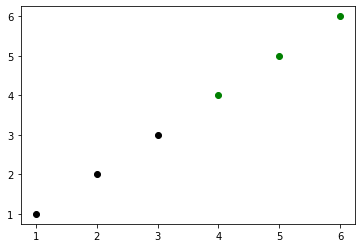

In [20]:
x_coordinates = [1,2,3]
y_coordinates = [1,2,3]

plt.scatter(x_coordinates, y_coordinates , c="black")

x_coordinates = [4,5,6]
y_coordinates = [4,5,6]

plt.scatter(x_coordinates, y_coordinates , c="green")

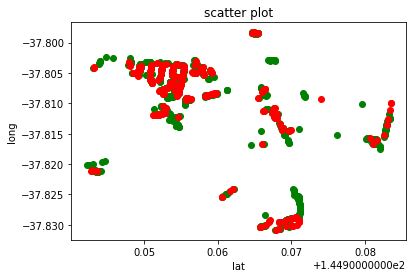

In [21]:
longUnoccupied = []
latUnoccupied = []

Unoccupied = []

longPresent = []
latPresent = []

Present = []

for index , i in status_location.iterrows():
    if(i[0] == 0):
        latUnoccupied.append(i[1])
        longUnoccupied.append(i[2])
        
        Unoccupied.append([i[1] , i[2]])
        
    else:
        latPresent.append(i[1])
        longPresent.append(i[2])
        
        Present.append([i[1] , i[2]])
        
        
plt.scatter(longUnoccupied, latUnoccupied , c="green")
plt.scatter(longPresent, latPresent , c="red")

plt.title('scatter plot')
plt.xlabel('lat')
plt.ylabel('long')

plt.show()

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeanPresent = KMeans(n_clusters=2)
kmeanPresent.fit(Present)

kmeanPresent.cluster_centers_

array([[-37.80668055, 144.95461571],
       [-37.81981217, 144.97017746]])

In [24]:
kmeanUnoccupied = KMeans(n_clusters=2)
kmeanUnoccupied.fit(Unoccupied)

kmeanUnoccupied.cluster_centers_

array([[-37.82074244, 144.97222461],
       [-37.80659254, 144.95418275]])

In [25]:
kmean_labels_present = kmeanPresent.labels_
kmean_labels_unoccupied = kmeanUnoccupied.labels_

display(kmeanPresent.labels_)
display(kmeanUnoccupied.labels_)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,

In [29]:
clustersListPresent = []
clustersListUnoccupied = []

clusterSet_present = set(kmean_labels_present)
clusterSet_unoccupied = set(kmean_labels_unoccupied)

for i in clusterSet_present:
    currentCluster = []
    for j in range(len(kmean_labels_present)):
        if(i == kmean_labels_present[j]):
            currentCluster.append(Present[j])
    
    currentCluster_df = pandas.DataFrame(currentCluster , columns=["lat" , "long"])
    clustersListPresent.append(currentCluster_df)

for i in clusterSet_unoccupied:
    currentCluster = []
    for j in range(len(kmean_labels_unoccupied)):
        if(i == kmean_labels_unoccupied[j]):
            currentCluster.append(Unoccupied[j])

    currentCluster_df = pandas.DataFrame(currentCluster , columns=["lat" , "long"])
    clustersListUnoccupied.append(currentCluster_df)


for i in clustersListPresent:
    display(i)

for i in clustersListUnoccupied:
    display(i)

,lat,long
0,-37.809170,144.965515
1,-37.820956,144.943013
2,-37.808443,144.959469
3,-37.805838,144.952144
4,-37.804656,144.953864
...,...,...
194,-37.804335,144.957692
195,-37.804293,144.957673
196,-37.804356,144.957702
197,-37.804378,144.957712


,lat,long
0,-37.828757,144.970660
1,-37.829225,144.967032
2,-37.824504,144.961638
3,-37.828894,144.970190
4,-37.828967,144.969938
...,...,...
59,-37.811494,144.967374
60,-37.812369,144.967774
61,-37.811378,144.967445
62,-37.811571,144.967532


,lat,long
0,-37.812774,144.983033
1,-37.815285,144.976156
2,-37.824098,144.962115
3,-37.816635,144.981164
4,-37.815746,144.980342
...,...,...
250,-37.814040,144.968792
251,-37.815191,144.969077
252,-37.813646,144.968484
253,-37.811402,144.967455


,lat,long
0,-37.806034,144.958672
1,-37.803591,144.957214
2,-37.812691,144.953367
3,-37.819565,144.944738
4,-37.807619,144.952797
...,...,...
644,-37.805123,144.958053
645,-37.804314,144.957683
646,-37.804851,144.957928
647,-37.803326,144.952904


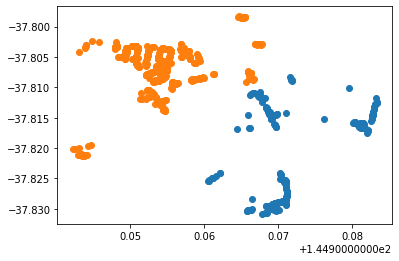

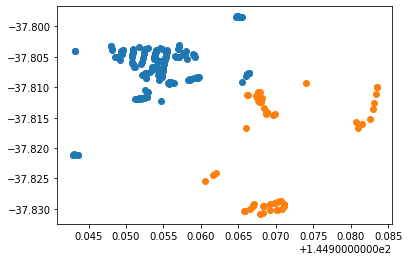

In [33]:
# plotting two clusters
for i in clustersListUnoccupied:
    plt.scatter(i["long"], i["lat"])

plt.show()

for i in clustersListPresent:
    plt.scatter(i["long"], i["lat"])

